## A study into Intel and AMD systems with an RTX 3080 using 3DMark benchmarking tools
*By Caesar Dominic Lindog*

## **Rationale**

>Consumer-grade computer GPUs (graphics processing unit) took quite a leap with Nvidia's RTX 3000 series by utilizing deep learning, artificial intelligence, and improved real-time ray-tracing performance for a number of video games.

Intel's comeuppance for neglecting its only competitor's growth since Ryzen first launched in 2017, there is this solidly-formed opinion that PC gamers have – that AMD has effectively closed the gap by always undercutting and offering more cores than Intel's offerings year by year.

This research is aimed towards people who are still in the decision-making process of selecting a CPU and chipset manufacturer to build a gaming PC or for those that are looped into always waiting for the 'next big thing' and not upgrading outright launching.

>AMD has slowly been on the uptick months after the first generation Ryzen CPUs and now, they have fully secured TSMC's capacity for 7nm fabrication.

Even though the control variable is currently short-stocked, I chose the new GeForce RTX 3080 GPU as a control variable to completely eliminate potential GPU bottlenecks the benchmarks' results would not show.

Below are the search parameters I used for pulling up results from [Time Spy (DX12), Port Royal (Ray-Tracing), and Fire Strike (DX11)](https://benchmarks.ul.com/3dmark) using [3DMark's Classic Search](https://https://www.3dmark.com/classic-search).

>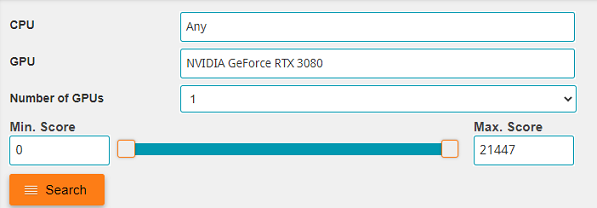\
*These gave me the first 950+ results on top of the benchmark leaderboards with a total of about 3000 records.*

## **Hypothesis**

>$Ho$ - *There is no difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

>$Ha$ - *There is a difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

### *Tests to be used*

Correlation tests will be ran to have a better overview of the data set scraped from 3DMark. While it is easy to generalize pre hoc that Intel still dominates the gaming market, it never is the finality hence the initiative for this research.

Albeit being continuous variables, benchmark scores and clock speeds rarely project normality, if not at all. Initially, I want to run numerous non-parametric t-tests and analyze variances by comparing scores between AMD and Intel systems with other variable to avoid Simpson's paradox.

*In summary,*  
* Non-parametric t-test (Mood's median test for the main research)
  * between Intel and AMD scores across the 3 benchmarks
  * between Intel and AMD scores entirely from the data set

## **Process**


The array of benchmarking tools and games that are publicly-accessible limited my tools of choice since I do have to scrape my own data. Knowing this, I went to 3DMark since they seemed to have the most accessible results' database across tiered benchmarks built to simulate specific use-cases.

>While I do understand the real-world disconnection (e.g. video games, video editing, decompression rates, deep learning, etc.) of synthetic benchmarks, the numbers they produce are still substantial in making an educated choice when it comes to upgrading and/or buying a new PC.

3DMark provides a good outlook on how well your system is against others', but checking results on the Hall of Fame along will never be enough for consumers looking to make the most out of their money.

Since there is currently no publicly-accessible data set for the benchmarks' results, I had to make a [scraper](https://https://colab.research.google.com/drive/1iWOszZQUSaMOdClU0wh5m2sVQOfwbkiW#scrollTo=MMmyXtUFDyu4&line=1&uniqifier=1).

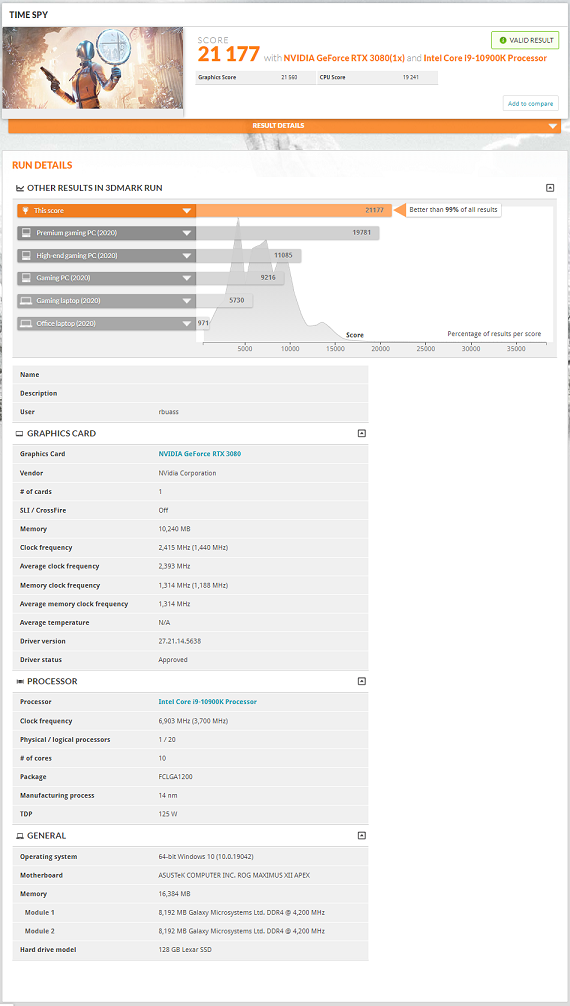



*No unique data was left, but not all is saved to an external file for analysis in this research.*

### *Niche-ception*

Gaming may not be a niche market naymore, but those who are into building computers with an extra touch of specificity and/or overclocking are definitely a one-of-a-kind demographic. The results you are about to see have outliers caused by extreme overclocking (pushing your components beyond their limits). The reason why I added this section is to further clarify the difference it may bring to the table when it comes to overall performance.

While it may have seemed fair to just collect the data of those who are still running within whitepaper or stock clocks, Intel's Turbo Boost and AMD's Precision Boost Overdrive do not exist for marketing purposes only (e.g. *up to 5.1GHz*) especially for SKUs that are meant to be overclocked.

Overclocking is an entire ecosystem in the already-small space of enthusiasts who are ready to burn up ours optimizing every component to the lowest voltages with most throughput and it will be highly negligible of me as a researcher if I do not include the ridiculously high scores that can only be achieved by liquid nitrogen and pure luck.

### *Research extension*

Personally, this is only the start of a huge project I want to work on until I learn everything I need to create the ultimate benchmark collector. 3DMark's results leave much to be desired, considering the thousands upon thousands of verified runs that can be pulled for analysis.

I appreciate you, the reader, scholar, enthusiast, passerby who are currently reading this, probably bewildered by the initial wall of text.

## **Analysis**

In [13]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import scipy

### *Dependencies*

Since we will be exploring *differences*, *correlations*, and *variances*, *numpy*, *scipy*, and *seaborn* will play important roles, one after another.

In [3]:
# dtype mapping to reduce dataframe size
combined_dtypes = {
    "id" : np.uint32,
    "benchmark_version" : str,
    "cpu_clock_freq" : np.uint16,
    "cpu_cores" : np.uint8,
    "cpu_litho" : np.uint8,
    "cpu_score" : np.uint16,
    "cpu_tdp" : np.uint8,
    "cpu_fps" : np.float16,
    "gpu_clock_freq" : np.uint16,
    "gpu_count" : np.uint8,
    "gpu_memclock_freq" : np.uint16,
    "gpu_score" : np.uint32,
    "gpu_vram" : np.uint16,
    "gt1" : np.float16,
    "gt2" : np.float16,
    "ram" : np.uint16,
    "ram_clock_freq" : np.uint16,
    "score" : np.uint16
}

In [4]:
"""
# fs for 'Fire Strike'
fs = pd.read_csv("/content/drive/My Drive/Capstone 1/3dmark_firestrike_3080.csv", parse_dates=['date'], encoding='utf-8')
fs_u = fs
# pr for 'Port Royal'
pr = pd.read_csv("/content/drive/My Drive/Capstone 1/3dmark_portroyal_3080.csv", parse_dates=['date'], encoding='utf-8')
pr_u = pr
# ts for 'Time Spy'
ts = pd.read_csv("/content/drive/My Drive/Capstone 1/3dmark_timespy_3080.csv", parse_dates=['date'], encoding='utf-8')
ts_u = ts
"""

data = pd.read_csv(
    "3dmarktimespy.csv.xz", 
    compression="xz", 
    parse_dates=["date"], 
    dtype=combined_dtypes
    )

print(f'We have {len(data)} samples.')

We have 1138545 samples.


>Checking the columns, it showed the different results each benchmark puts out. Also, there were instances wherein the RAM's clock speed was not logged correctly, resulting in text data from the Storage/Hard drive model section be pulled instead.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138545 entries, 0 to 1138544
Data columns (total 30 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1138545 non-null  uint32        
 1   benchmark           1138545 non-null  object        
 2   benchmark_version   1138545 non-null  object        
 3   cpu_clock_freq      1138545 non-null  uint16        
 4   cpu_cores           1138545 non-null  uint8         
 5   cpu_litho           1138545 non-null  uint8         
 6   cpu_make            1138545 non-null  object        
 7   cpu_score           1138545 non-null  uint16        
 8   cpu_sku             1138545 non-null  object        
 9   cpu_socket          1138545 non-null  object        
 10  cpu_tdp             1138545 non-null  uint8         
 11  cpu_fps             1138545 non-null  float16       
 12  date                1138545 non-null  datetime64[ns]
 13  gpu         

### Initial analysis

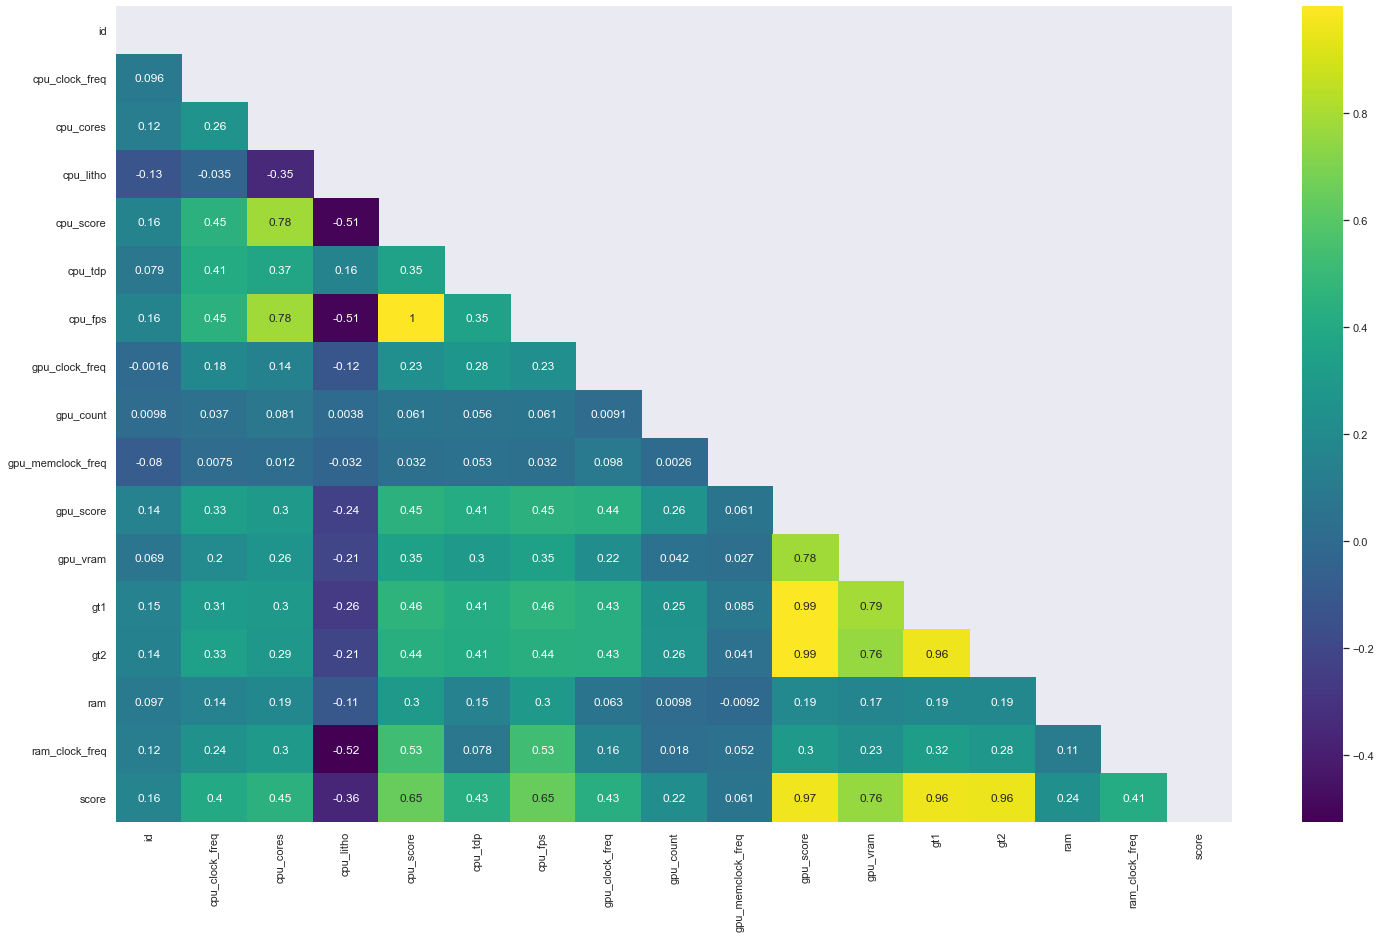

In [9]:
mask = np.triu(np.ones_like(data.corr()))
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(
    data.corr(),
    cmap='viridis',
    mask=mask,
    annot=True
)
plt.show()

>*As this heatmap shows, these are the most noteworthy positive correlations:*
* *gt1* and *gt2* to *gpu_score* (Time Spy's Graphics Test)
* *score* to *gpu_score*
* *cpu_fps* to *cpu_score* (Time Spy's CPU Test)
* **

The positive correlations seen above make sense, considering that *cpu_fps* defines *cpu_score*. Also, For *gt1* and *gt2* to define *gpu_score*.

Due to these correlations, *gpu_score*, *gt1*, and *gt2* are to be dropped from the dataset before splitting.

In [11]:
data.drop(["gpu_score", "gt1", "gt2"], axis=1, inplace=True)

In [12]:
intel = data[data['cpu_make'] == 'Intel']
amd = data[data['cpu_make'] == 'AMD']

>*Grouped and made separated DataFrames for Intel and AMD systems for later use.*

In [57]:
cpu = ["Intel", "AMD"]
grouping = pd.DataFrame([len(intel), len(amd)])
grouping["cpu"] = cpu
grouping.columns = ["Results", "CPU"]

px.bar(grouping, x="CPU", y="Results")

As seen above, the AMD class needs to be sampled without replacement to eliminate class imbalance.

In [58]:
amd = amd.sample(450490, replace=False)
df_u = pd.concat([intel, amd])

print('New AMD size: {}'.format(amd.shape))

New AMD size: (450490, 27)


>*AMD class results outnumber Intel and this might be the effect of taking just the first page of results. Either way, randomly sampling without replacement from the AMD set will make further analysis meaningful.*

### Boxplots

While boxplots may seem archaic, they're the most useful for presenting data between non-normal samples with outliers.

#### *Fire Strike scores*

#### *Time Spy scores*

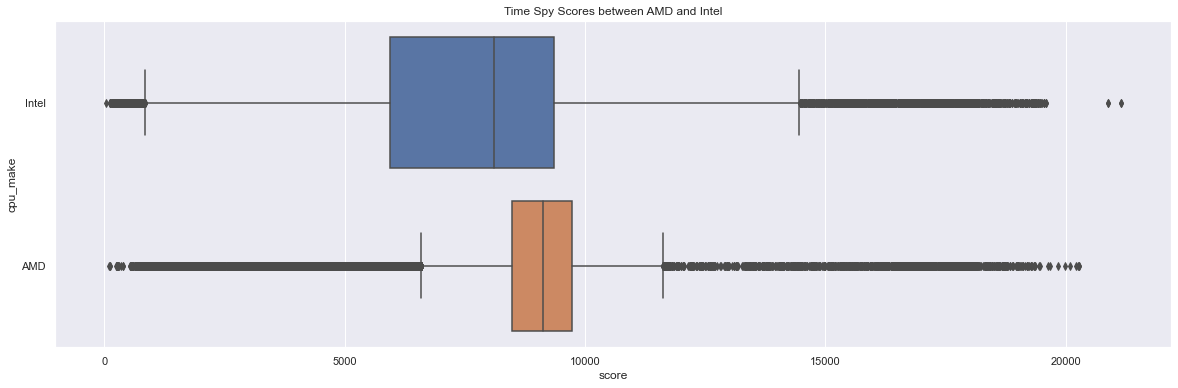

In [62]:
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(20,6)})
ts_med = sns.boxplot(data=df_u, x='score', y='cpu_make', orient='h')
ts_med.set_title('Time Spy Scores between AMD and Intel')
plt.show()

>*Time Spy scores show near-full overlap between Intel and AMD's IQR, potentially showing no difference when tested for significance. Considering that Intel has outliers, Mood's median test suffices.*

>*Even though Port Royal is GPU-bound since it tests an RTX card's ray-tracing capability, Intel varies more in median than AMD with an overlap. Again, outliers are very visible on Intel possibly due to higher clock speeds their CPUs can produce when cooled properly.*

Now that the boxplot is set, it is time for Mood's median test of significance.

## Non-parametric Tests
Now, we are about to establish to get to a conclusion and whether or not the null hypothesis should be rejected or accepted.

To refresh-
>$Ho$ - *There is no difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

>$Ha$ - *There is a difference in performance between AMD and Intel systems in 3DMark's benchmarking tools.*

### Mood's Median Test

### *Time Spy scores*
>$Ho$ - There is no difference between Time Spy scores between Intel and AMD

In [73]:
print('AMD: ' + str(len(amd)))
print('Intel: ' + str(len(intel)))

stat, p, med, tbl = stats.median_test(intel.score, amd.score)
print('P-value: {:.10f}\nMedian: {}'.format(p, med))

AMD: 450490
Intel: 450490
P-value: 0.0000000000
Median: 8808.0


>*After sampling with 450,490 samples and getting a p-value of effectively 0, the null hypothesis of having no difference between the Time Spy scores of Intel and AMD systems is accepted. This means that there is no probability of observing the same difference with random error.*

## **Summary**

With all the data that was processed and analyzed, I therefore say that this research is inconclusive. I was not able to re-scrape Fire Strike and Port Royal data in time like before, but I believe that my new scraper has worked well since it got me around 1 million results alone on Time Spy.